http://www.maths.dit.ie/~johnbutler/Izhikevich/IzhikevichModel.html

In [1]:
import numpy as np
import sys

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

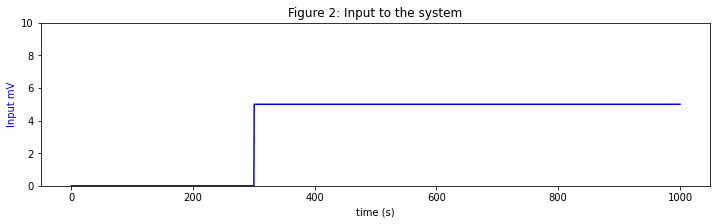

In [2]:

h=0.5
input_onset=300             
input_amp=5                 

time=np.arange(0,1000.1,h)  

def Input(input_onset,input_amp):
    I=np.zeros((len(time)))     

    for k in range (0,len(time)):
        if time[k] >input_onset:
            I[k]=input_amp
    return I

   
fig, ax1 = plt.subplots(figsize=(12,3))
ax1.plot(time, Input(input_onset,input_amp), 'b-') 
ax1.set_xlabel('time (s)') 

ax1.set_ylabel('Input mV', color='b')
ax1.set_ylim(0,input_amp*2)
plt.title('Figure 2: Input to the system')
plt.show()  

In [3]:
def Discrete_Model(a,b,u,v,I):
    v = v + h *(0.04*v*v+5*v+140-u+I) 
    u = u + h *(a*(b*v-u))            
    return u,v   

In [4]:
def Izhikevich(a,b,c,d):
    v=-65*np.ones((len(time)))  
    u=0*np.ones((len(time)))   
    u[0]=b*v[0]                 
    spiketime=[]
    fired=[]
    I=Input(input_onset,input_amp)

    for k in range (0,len(time)-1):
        u[k+1],v[k+1]=Discrete_Model(a,b,u[k],v[k],I[k])
           
        if v[k+1]>30:
            v[k+1]=c
            u[k+1]=u[k+1]+d
    plot_input_output(time,v,I,a,b,c,d) 

In [5]:
def plot_input_output(time,v,I,a,b,c,d):   
    # PLOTTING
    fig, ax1 = plt.subplots(figsize=(12,3))
    ax1.plot(time, v, 'b-', label = 'Output')
    ax1.set_xlabel('time (ms)')
    # Make the y-axis label, ticks and tick labels match the line color.
    # Plotting out put 
    ax1.set_ylabel('Output mV', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(-95,40)
    ax2 = ax1.twinx()
    # Plotting input on a different axis
    ax2.plot(time, I, 'r', label = 'Input')
    ax2.set_ylim(0,input_amp*20)
    ax2.set_ylabel('Input (mV)', color='r')
    ax2.tick_params('y', colors='r')
    
    fig.tight_layout()
    ax1.legend(loc=1)
    ax2.legend(loc=3)
    ax1.set_title('Parameters a %s b: %s c:  %s d:  %s' %(a,b,c,d))
    plt.show()

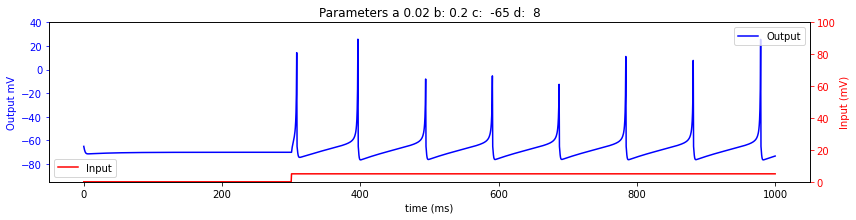

In [6]:
# a - b - c - d
Izhikevich(0.02,0.2,-65,8)

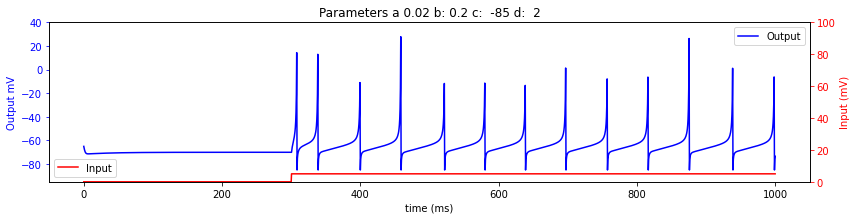

In [18]:
# a - b - c - d
Izhikevich(0.02,0.2,-85,2)